In [92]:
import numpy as np
import scipy.io as io
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#Clase Solucion
class solution:
    def __init__(self):
        self.rutas = []

#Clase Ruta
class route:
    def __init__(self):
        self.nv_nodes = []
        self.v_nodes = []
        self.r_time = 0

#Clase Nodo        
class node:
    def __init__(self, n_type, num, dem, coord_x, coord_y):
        self.n_type = n_type
        self.num = num
        self.dem = dem
        self.coord_x = coord_x
        self.coord_y = coord_y

#Clase Vehiculo
class veh:
    def __init__(self, num, cap):
        self.num = num
        self.cap = cap
        
#Clase Escenario
class Esc:
    def __init__(self, deps, cust, vehs):
        self.deps = deps
        self.cust = cust
        self.vehs = vehs
        self.iroute = route
        
    def set_init_route(self, route):
        self.init_route = route
        return self

In [28]:
# Lectura de datos de instancia desde excel
df = pd.read_excel('../Instancias_Excel/InsTest1.xlsx', '1')
df['coord_x'] = df['coord_x']/1000000
df['coord_y'] = df['coord_y']/1000000

# Depositos
dep_x = df['coord_x'].values[0:20]
dep_y = df['coord_y'].values[0:20]
dep_c = df['demands'].values[0:20]

#Cientes
cust_x = df['coord_x'].values[20:]
cust_y= df['coord_y'].values[20:]
cust_d = df['demands'].values[20:]

#Vehiculos
v_cap = df['v_cap'].values[0]

In [29]:
# Creacion del escenario
# nodos tipo 0 son clientes
# nodos tipo 1 son depositos (hidrantes)

sd = dep_x.shape[0]  # Numero de depositos (hidrantes)
sc = cust_x.shape[0] # Numero de clientes
sv = 15              # Numero de vehiculos
deps = []
cust = []
vehs = []
# Creacion de los nodos cliente
for i in range(sc):
    cust.append(node(0, i, cust_d[i], cust_x[i], cust_y[i]))
    
# Creacion de los nodos deposito (hidrante)   
for i in range(sd):
    deps.append(node(1, i, dep_c[i], dep_x[i], dep_y[i]))
    
# Creacion de vehiculos (cisternas)
for i in range(sv):
    vehs.append(veh(i, v_cap))
    
#esc = Esc(deps, cust, vehs)
#esc = esc.set_init_route(route)

route = list(np.random.permutation(cust))

In [30]:
def euclidean(node1, node2):
    return np.sqrt((node1.coord_x - node2.coord_x)**2 + (node1.coord_y - node2.coord_y)**2)

In [114]:
# Esta funcion devuelve el nodo mas cercado al buscado
def seek_dist(cust, cust_list, vis):
    dist_vec = []
    near = None
    #Guardar todas las distancias a los nodos
    for i in cust_list:
        if cust.num != i.num:
            euc = euclidean(cust, i)
            dist_vec.append([euc, i])
    #Ordenar nodos por cercania de menor a mayor distancia
    sort_dist = sorted(dist_vec, key=lambda x: x[0])
    print('Metodo seek_dist: ')
    print('')
    for i in sort_dist:
        #selecciono el nodo mas cercano que no se encuentre dentro de la lista de visitados
        #print(i[1].num)
        if i[1].num not in vis:
            near = i[1]
            break
    print('visited: ')
    print(vis)
    return near

In [100]:
def evalcust(cust, cap):
    if cap > cust.dem:
        return True
    else:
        return False

In [117]:
def sum_clus(clus_list):
    sum = 0
    for i in clus_list:
        sum += len(i)
    return sum

In [120]:
def clustering(cust_list, veh):
    cap = np.copy(veh.cap)
    perm = list(np.random.permutation(cust_list))
    init_node = perm[0]
    clus_list = []
    clus = [init_node]
    visited = [init_node.num]
    while sum_clus(clus_list) < len(cust_list):
        for i in range(len(perm)):
            next_node = seek_dist(init_node, cust_list, visited)            
            if next_node is not None:
                while next_node.num in visited:
                    next_node = seek_dist(init_node, cust_list, visited)
                if evalcust(next_node, cap):
                    clus.append(next_node)
                    cap -= next_node.dem
                    visited.append(next_node.num)            
                elif i == len(perm) - 1:                    
                    clus_list.append(clus)
                    print('cluster:')
                    for j in clus:
                        print(j.num)
                    print('')
                    clus = []
                    cap = np.copy(veh.cap)
                init_node = next_node
            else:
                clus_list.append(clus)
                print('cluster:')
                for j in clus:
                    print(j.num)
                print('')
    return clus_list

In [121]:
clusters = clustering(cust, vehs[0])
k = 0
vec = []
vecn = []
vecnx = []
vecny = []
vecx = []
vecy = []
v100 = []
for i in range(len(clusters)):
    #print('cluster: '+str(i))
    #print(len(clusters[i]))
    for j in clusters[i]:
        vec.append(j.num)
        vecx.append(j.coord_x)
        vecy.append(j.coord_y)
    #    print('node: '+str(j.num))
    #    k += 1
    #    print(k)
for i in range(100):
    if i not in vec:
        print(i)
        vecn.append(cust[i])
        print(cust[i].num)
        vecnx.append(cust[i].coord_x)
        vecny.append(cust[i].coord_y)
vecnx = np.array(vecnx)
vecny = np.array(vecny)
vecx = np.array(vecx)
vecy = np.array(vecy)

Metodo seek_dist: 

visited: 
[87]
Metodo seek_dist: 

visited: 
[87, 84]
Metodo seek_dist: 

visited: 
[87, 84, 82]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85]
Metodo seek_dist: 

visited: 
[87, 84, 82, 8

Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85,

[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1]
Metodo seek_di

Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1, 34, 20, 37, 26, 22, 30, 29, 23, 27, 33, 24, 28, 36, 25, 21, 18, 35, 31, 39]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1, 34, 20, 37, 26, 22, 30, 29, 23, 27, 33, 24, 28, 36, 25, 21, 18, 35, 31, 39]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1, 34, 20, 37, 26, 22, 30, 29, 23, 27, 33, 24, 28, 36, 25, 21, 18, 35, 31, 39]
Metodo see

Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1, 34, 20, 37, 26, 22, 30, 29, 23, 27, 33, 24, 28, 36, 25, 21, 18, 35, 31, 39, 19, 38, 32, 62, 66, 63, 79, 76, 71, 78, 67, 72, 75, 70, 77, 74, 69, 65, 73, 64]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 53, 57, 44, 52, 10, 12, 15, 14, 11, 5, 13, 4, 16, 17, 7, 6, 3, 9, 2, 8, 1, 34, 20, 37, 26, 22, 30, 29, 23, 27, 33, 24, 28, 36, 25, 21, 18, 35, 31, 39, 19, 38, 32, 62, 66, 63, 79, 76, 71, 78, 67, 72, 75, 70, 77, 74, 69, 65, 73, 64]
Metodo seek_dist: 

visited: 
[87, 84, 82, 80, 93, 97, 94, 95, 96, 85, 89, 92, 88, 81, 99, 83, 90, 91, 98, 86, 56, 43, 40, 54, 41, 60, 49, 46, 55, 45, 51, 47, 42, 58, 59, 48, 50, 5

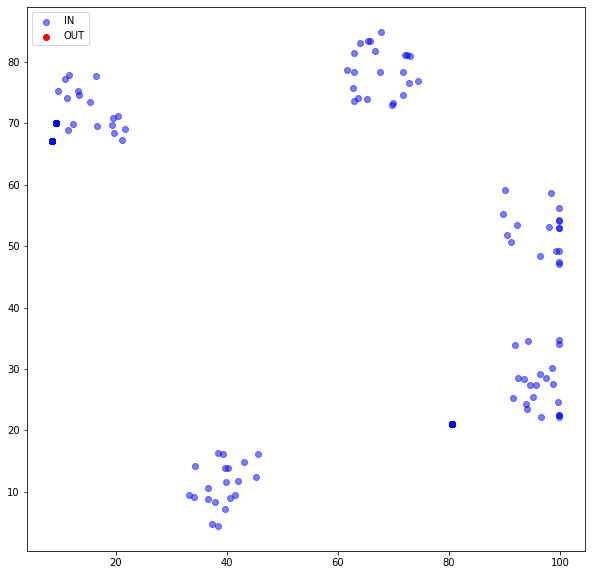

In [122]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.scatter(vecx, vecy, c='b', alpha=0.5, label='IN')
ax1.scatter(vecnx, vecny, c='r', alpha=1, label='OUT')
plt.legend(loc='upper left');
plt.show()